In [1]:
# imports 
from numpy import quantile, random, where
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_blobs
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [2]:
new_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
os.chdir(new_dir)

print('In Predictive Model Folder:', os.getcwd())

In Predictive Model Folder: c:\Users\ashly\OneDrive\Documents\Education Material\ResearchProject\MaternalHealthResearch\predictive-model


Isolation Forest implementation to detect anomalies in heart rate - Next Steps: https://blog.paperspace.com/anomaly-detection-isolation-forest/#:~:text=Isolation%20Forest%20uses%20an%20ensemble,split%20value%20for%20the%20feature.

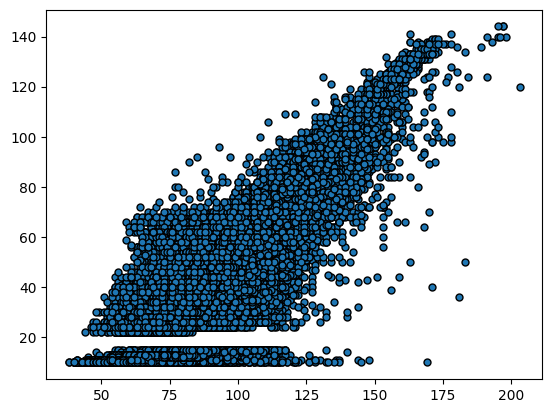

In [3]:
df = pd.read_csv('data_interim/heartrate_mets_merged_inner.csv')

plt.scatter(df['bpm'], df['mets'], marker="o", s=25, edgecolor="k")

In [4]:
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
model.fit(df[['bpm']])

IsolationForest(contamination=0.1, n_estimators=50)

In [5]:
df['scores']=model.decision_function(df[['bpm']])
df['anomaly']=model.predict(df[['bpm']])
df.head(20)

,id,timestamp,mets,bpm,scores,anomaly
0,2022484408,4/12/2016 7:21:00 AM,32,97,0.030066,1
1,2022484408,4/12/2016 7:23:00 AM,13,60,0.128706,1
2,2022484408,4/12/2016 7:24:00 AM,10,58,0.111600,1
3,2022484408,4/12/2016 7:26:00 AM,24,53,0.050730,1
4,2022484408,4/12/2016 7:27:00 AM,10,53,0.050730,1
5,2022484408,4/12/2016 7:28:00 AM,26,60,0.128706,1
6,2022484408,4/12/2016 7:30:00 AM,26,78,0.095675,1
7,2022484408,4/12/2016 7:35:00 AM,11,67,0.122064,1
8,2022484408,4/12/2016 7:41:00 AM,36,92,0.061315,1
9,2022484408,4/12/2016 7:45:00 AM,13,83,0.053571,1


In [6]:
anomaly=df.loc[df['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

                id              timestamp  mets  bpm    scores  anomaly
14      2022484408   4/12/2016 7:56:00 AM    52  101 -0.002890       -1
16      2022484408   4/12/2016 7:58:00 AM    48  104 -0.016211       -1
18      2022484408   4/12/2016 8:00:00 AM    42  106 -0.026544       -1
19      2022484408   4/12/2016 8:01:00 AM    46  105 -0.023914       -1
20      2022484408   4/12/2016 8:02:00 AM    44  104 -0.016211       -1
...            ...                    ...   ...  ...       ...      ...
200010  8877689391   5/11/2016 5:49:00 PM    71  114 -0.072260       -1
200011  8877689391   5/11/2016 5:50:00 PM    57  111 -0.040618       -1
200012  8877689391   5/11/2016 5:52:00 PM    53  108 -0.022995       -1
200013  8877689391   5/11/2016 5:53:00 PM    54  103 -0.014111       -1
200065  8877689391  5/12/2016 12:19:00 PM    68  101 -0.002890       -1

[19924 rows x 6 columns]


In [16]:
outliers_counter = len(df[df['bpm'] > 170])
outliers_counter

57

In [17]:
print("Accuracy percentage:", 100*list(df['anomaly']).count(-1)/(outliers_counter))

Accuracy percentage: 34954.38596491228
